# TensorFlow 

Machine learning frameworks like TensorFlow, PaddlePaddle, Torch, Caffe, Keras, and many others can speed up the machine learning development significantly when compared to building the algorithms in python.Programing frameworks can not only shorten your coding time, but sometimes also perform optimizations that speed up your code. In this notebook,we experiment with the  following in TensorFlow: 

- Compute a linear function
- Compute sigmoid function
- Compute cost for neural networks
- Create one hot encoding matrix
- Initialize a vector of zeros and ones.
- Implement a Neural Network

In [1]:
# Importing tensor flow libraries
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(123)

Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 


###  Linear function

We compute the following equation: $Y = WX + b$, where $W$ and $X$ are random matrices and b is a random vector. 
W is of shape (4, 3), X is (3,1) and b is (4,1). 

In [2]:
def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(123)
    

    X = tf.constant(np.random.randn(3,1),name="X")
    W = tf.constant(np.random.randn(4,3),name="W")
    b = tf.constant(np.random.randn(4,1),name="b")
    Y = tf.constant(np.random.randn(4,1))
 
    
    # Creating the session using tf.Session() and running it with sess.run(...) on the variable we want to calculate
    
    ### START CODE HERE ###
    sess = tf.Session()
    result = sess.run(tf.add(tf.matmul(W,X),b))
    ### END CODE HERE ### 
    
    # close the session 
    sess.close()

    return result

In [3]:
print( "result = " + str(linear_function()))

result = [[ 1.09118507]
 [ 4.77086602]
 [ 2.42386138]
 [-1.37788767]]


### Computing Sigmoid 
Tensorflow offers a variety of commonly used neural network functions like `tf.sigmoid` and `tf.softmax`.We implement sigmoid for our learning purpose 

Note that there are two typical ways to create and use sessions in tensorflow: 

**Method 1:**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() 
# Close the session
```
**Method 2:**
```python
with tf.Session() as sess: 
    # run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session for you
```


In [4]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    # Create a placeholder for x. Name it 'x'.
    x = tf.placeholder(tf.float32,name="x")

    # compute sigmoid(x)
    sigmoid = tf.sigmoid(x)

    # Creating a session, and running it. 
    #Using the method 2 explained above. 
       
    with tf.Session() as sess:
            result = sess.run(sigmoid,feed_dict={x: z})
    
       
    return result

In [5]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.999994


###  Computing the Cost

Instead of needing to write code to compute the cost as a function of $a^{[2](i)}$ and $y^{(i)}$ for i=1...m: 
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{1}$$

we can do it in one line of code in tensorflow.


In [6]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (1))
    """

    # Creating the placeholders for "logits" (z) and "labels" (y) 
    z = tf.placeholder(tf.float32,name="z")
    y = tf.placeholder(tf.float32,name="y")
    
    # Using the loss function 
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y)
    
    # Creating a session 
    sess = tf.Session()
    
    # Running the session 
    cost = sess.run(cost,feed_dict={z: logits,y: labels})
    
    # Closing the session 
    sess.close()
    
    return cost

In [7]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [ 1.00538719  1.03664076  0.41385433  0.39956617]


###  One Hot encodings

Many times we encounter a y vector with numbers ranging from 0 to C-1, where C is the number of classes.We convert this vector using a technique called "one hot" encoding,where the converted representation had exactly one element of each column as "hot" (meaning set to 1). To do this conversion in numpy, we might have to write a few lines of code. In tensorflow, we can use one line of code: 

- tf.one_hot(labels, depth, axis) 


In [8]:

def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
     
    # Creating a tf.constant equal to C (depth), name it 'C'. 
    C = tf.constant(C,name="C")
    
    # Using tf.one_hot
    one_hot_matrix = tf.one_hot(labels,C,axis=0)
    
    # Creating the session 
    sess = tf.Session()
    
    # Running the session 
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    
    return one_hot

In [9]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[ 0.  0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.]]


### Initialize with zeros and ones


In [10]:
def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
       
    # Creating "ones" tensor using tf.ones(...).
    ones = tf.ones(shape)
    
    # Creating the session 
    sess = tf.Session()
    
    # Running the session to compute 'ones' 
    ones = sess.run(ones)
    sess.close()

    return ones

In [11]:
print ("ones = " + str(ones([3])))

ones = [ 1.  1.  1.]


## Implementing a neural network in tensorflow

### Problem statement: SIGNS Dataset

Then problem statement and the dateset is borrowed form the course assignment in Improving Deep Neural Nets(Coursera) by Andrew Ng.

One afternoon, with some friends we decided to teach our computers to decipher sign language. We spent a few hours taking pictures in front of a white wall and came up with the following dataset. It's now your job to build an algorithm that would facilitate communications from a speech-impaired person to someone who doesn't understand sign language.

- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs.

In [12]:
# Loading the dataset
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


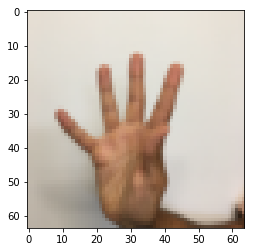

In [13]:
# Example of a picture
index = 12
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

### Preprocessing
We implement the following pre processing steps:

- Flatten the image dataset
- Normalize it by dividing by 255. 
- Convert each label to a one-hot vector 

In [14]:
# Flattening the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalizing image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

# Converting training and test labels to one hot matrices
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


**Our goal** is to build an algorithm capable of recognizing a sign with high accuracy. To do so, we are going to build a tensorflow model.

**The model** is *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. We use oftmax as an output layer because a softmax layer generalizes SIGMOID to when there are more than two classes. 

In [15]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    """
    X = tf.placeholder(tf.float32,shape=(n_x,None))
    Y = tf.placeholder(tf.float32,shape=(n_y,None))
    
    return X, Y

In [16]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(6, ?), dtype=float32)


### Initializing the parameters

Your second task is to initialize the parameters in tensorflow using Xavier Initialization for weights and Zero Initialization for biases.

In [17]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(123)                  

    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1],initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1],initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6,1],initializer = tf.zeros_initializer())
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [18]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


The parameters haven't been evaluated yet.

### Forward propagation in tensorflow 

We will now implement the forward propagation module in tensorflow. The function will take in a dictionary of parameters and it will complete the forward pass.


In [19]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieving the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
                                                                    # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1)                                 # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                             # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                             # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                 # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

In [20]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


### Computing cost


In [21]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
   
    return cost

In [22]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


###  Backward propagation & parameter updates

After we compute the cost function, we will create an "`optimizer`" object. We have to call this object along with the cost when running the tf.session. When called, it will perform an optimization on the given cost with the chosen method and learning rate.

For instance, for gradient descent the optimizer would be:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

To make the optimization we would do:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to inputs.


In [23]:
#Function for random mini batches
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
        
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

###  Building the model


In [24]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(123)                            
    seed = 123                                          
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X,Y = create_placeholders(n_x,n_y)
 
    # Initialize parameters
    parameters = initialize_parameters()
  
    
    # Forward propagation: Building the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X,parameters)
  
    #Cost function: Adding cost function to tensorflow graph
    cost = compute_cost(Z3,Y)
 
    
    # Backpropagation: Defining the tensorflow optimizer.
    #Using an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Initializing all the variables
    init = tf.global_variables_initializer()

    # Starting the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        sess.run(init)
        
        #  training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # Running the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
               
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
               
                
                epoch_cost += minibatch_cost / num_minibatches

            # Printing the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # ploting the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculating the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculating accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Run the following cell to train your model! On our machine it takes about 5 minutes. Your "Cost after epoch 100" should be 1.016458. If it's not, don't waste time; interrupt the training by clicking on the square (⬛) in the upper bar of the notebook, and try to correct your code. If it is the correct cost, take a break and come back in 5 minutes!

Cost after epoch 0: 1.882616
Cost after epoch 100: 1.028612
Cost after epoch 200: 0.715003
Cost after epoch 300: 0.543989
Cost after epoch 400: 0.436578
Cost after epoch 500: 0.368672
Cost after epoch 600: 0.285531
Cost after epoch 700: 0.243357
Cost after epoch 800: 0.188955
Cost after epoch 900: 0.153733
Cost after epoch 1000: 0.122976
Cost after epoch 1100: 0.104146
Cost after epoch 1200: 0.083846
Cost after epoch 1300: 0.063842
Cost after epoch 1400: 0.046236


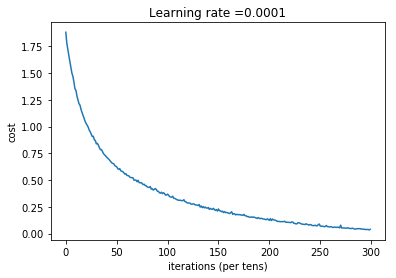

Parameters have been trained!
Train Accuracy: 0.997222
Test Accuracy: 0.8


In [34]:
parameters = model(X_train, Y_train, X_test, Y_test)



<table> 
    <tr> 
        <td>
            **Train Accuracy**
        </td>
        <td>
        0.997222
        </td>
    </tr>
    <tr> 
        <td>
            **Test Accuracy**
        </td>
        <td>
        0.8
        </td>
    </tr>

</table>


**Insights**:
- Our model seems big enough to fit the training set well. 
- However, given the difference between train and test accuracy, we could try to add L2 or dropout regularization to reduce overfitting. 


<font color='blue'>
**Things to remember**:
- Tensorflow is a programming framework used in deep learning
- The two main object classes in tensorflow are Tensors and Operators. 
- When we code in tensorflow we have to take the following steps:
    - Create a graph containing Tensors (Variables, Placeholders ...) and Operations (tf.matmul, tf.add, ...)
    - Create a session
    - Initialize the session
    - Run the session to execute the graph
- WE can execute the graph multiple times as you've seen in model()
- The backpropagation and optimization is automatically done when running the session on the "optimizer" object.